<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2007/07_ensemble_learning_and_random_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Inisialisasi beberapa model classifier
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42) # probability=True untuk soft voting

# Menggabungkan model ke dalam VotingClassifier
# voting='hard' untuk hard voting, 'soft' untuk soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)
# voting_clf.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Melatih model Random Forest dengan 500 pohon
# n_jobs=-1 akan menggunakan semua core CPU untuk mempercepat pelatihan
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
# rnd_clf.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Melatih model Gradient Boosting untuk Regresi
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, learning_rate=0.1, random_state=42)
# gbrt.fit(X, y)

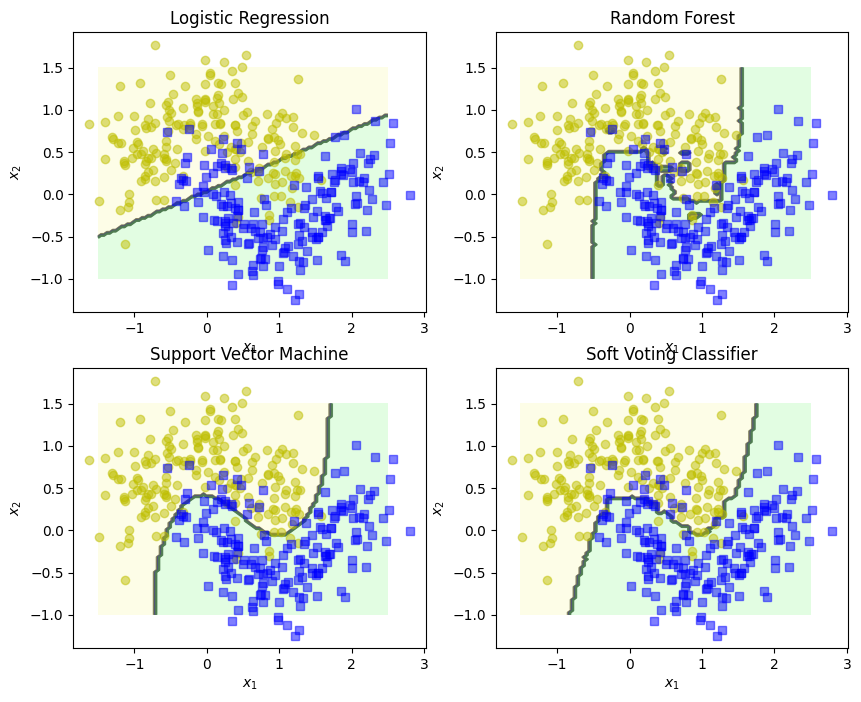

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# --- Kode Setup untuk membuat data ---
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# --- Akhir dari Kode Setup ---


# --- KODE YANG DIPERBAIKI ---

# Inisialisasi dan latih semua model
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)
log_clf.fit(X_train, y_train)
rnd_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)


# Fungsi untuk plot batas keputusan (sudah diperbaiki)
def plot_decision_boundary(clf, X, y, alpha=0.5, contour=True):
    # Fungsi ini sekarang tidak lagi menerima parameter 'axes' untuk batas sumbu
    x1s = np.linspace(-1.5, 2.5, 100)
    x2s = np.linspace(-1, 1.5, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")

# Membuat subplot
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,8))

# Daftar model dan subplotnya
models = [log_clf, rnd_clf, svm_clf, voting_clf]
titles = ["Logistic Regression", "Random Forest", "Support Vector Machine", "Soft Voting Classifier"]
axes_flat = axes.flatten()

# Looping untuk membuat setiap plot
for clf, ax, title in zip(models, axes_flat, titles):
    plt.sca(ax) # Mengaktifkan subplot yang sesuai
    plot_decision_boundary(clf, X_train, y_train)
    ax.set_title(title)

plt.show()

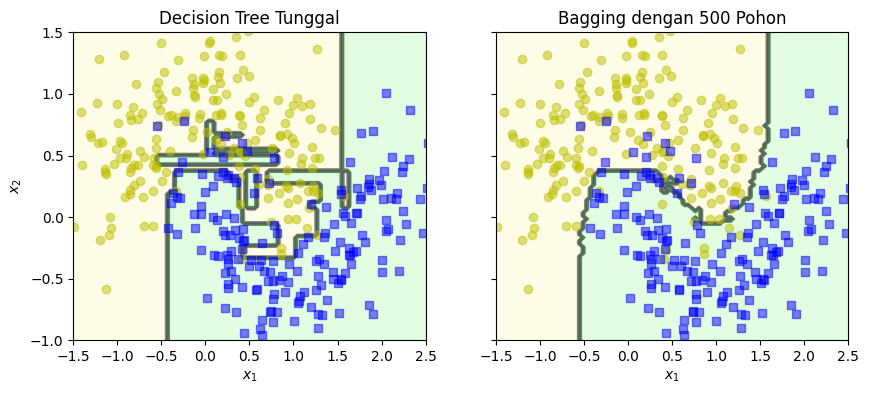

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Model Decision Tree tunggal dan model Bagging
tree_clf = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

tree_clf.fit(X_train, y_train)
bag_clf.fit(X_train, y_train)

# Plotting
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree Tunggal")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Bagging dengan 500 Pohon")
plt.ylabel("")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


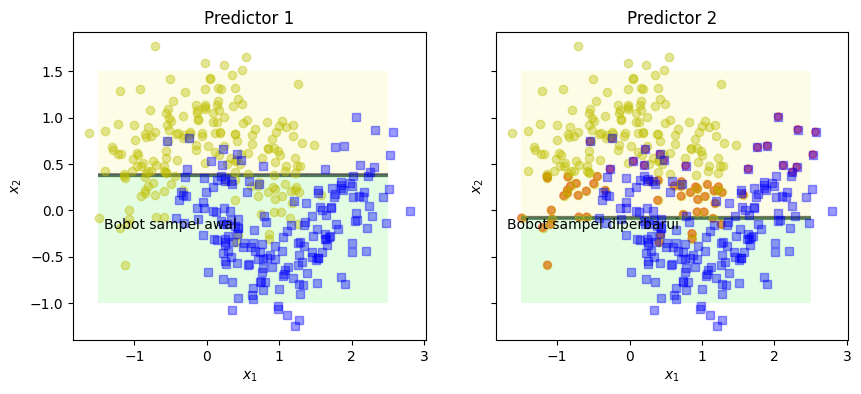

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# --- Kode Setup untuk membuat data ---
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# --- Akhir dari Kode Setup ---


# --- KODE YANG DIPERBAIKI ---

# Inisialisasi model AdaBoost dengan algoritma "SAMME"
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME",  # <- INI BAGIAN YANG DIPERBAIKI
    learning_rate=0.5,
    random_state=42
)
ada_clf.fit(X_train, y_train)


# Fungsi untuk plot batas keputusan
def plot_decision_boundary(clf, X, y, alpha=0.5, contour=True):
    x1s = np.linspace(-1.5, 2.5, 100)
    x2s = np.linspace(-1, 1.5, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")


# Plotting dua predictor pertama untuk menunjukkan cara kerja AdaBoost
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
for i in [0, 1]:
    plt.sca(axes[i])
    plot_decision_boundary(ada_clf.estimators_[i], X_train, y_train, alpha=0.4)
    plt.title(f"Predictor {i+1}")
    if i == 0:
        plt.text(-0.5, -0.2, "Bobot sampel awal", ha="center")
    else:
        # Menghitung dan menampilkan bobot sampel yang diperbarui
        y_pred = ada_clf.estimators_[i-1].predict(X_train)
        weights = ada_clf.estimator_weights_[i-1] * (y_pred != y_train)
        plt.scatter(X_train[:, 0], X_train[:, 1], c="red", s=weights * 40, alpha=0.5)
        plt.text(-0.5, -0.2, "Bobot sampel diperbarui", ha="center")

plt.show()

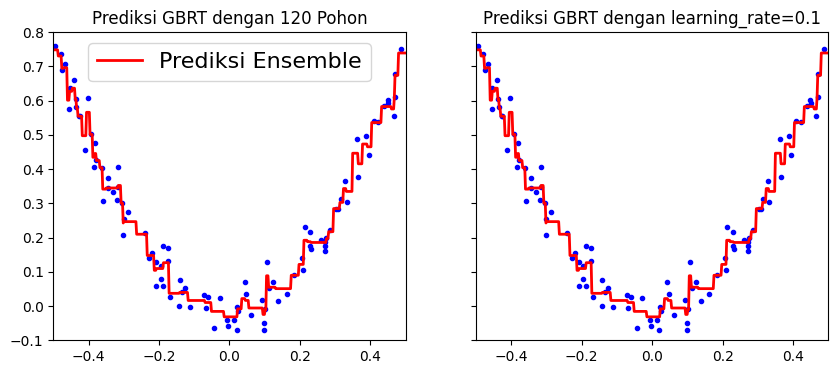

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Membuat data kuadratik
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

# Melatih model GBRT
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X, y)

def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Plotting
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Prediksi Ensemble")
plt.title(f"Prediksi GBRT dengan {gbrt.n_estimators} Pohon")
plt.sca(axes[1])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Prediksi GBRT dengan learning_rate=0.1")
plt.show()

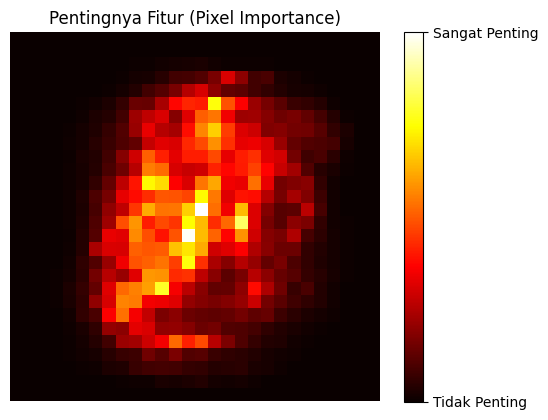

In [ ]:
from sklearn.datasets import fetch_openml

# Mengambil data MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

# Melatih Random Forest Classifier pada data MNIST
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

# Mengambil skor pentingnya fitur dan menampilkannya sebagai gambar
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap="hot", interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Tidak Penting', 'Sangat Penting'])
plt.title("Pentingnya Fitur (Pixel Importance)")
plt.show()